# A3- Jupyter Charts
## Evelyn Lee
## May 1 ,2022

### Introduction
Datasets: metacritic_movies.csv, imdb_superhero.csv

This notebook will explore the movie datasets and create charts using matplotlib and seaborn to find interesting facts about the movies. 

In [3]:
# load csv files using Pandas
import pandas as pd

metacritic = pd.read_csv('metacritic_movies.csv')
imdb = pd.read_csv('imdb_superhero.csv')

print(type(metacritic))
#print(metacritic.shape)
#print(imdb.shape)

<class 'pandas.core.frame.DataFrame'>


In [4]:
#quick view on the datasets
metacritic.head()

,movie_id,title,release_date,description,score,thumbnail
0,11234,"Crouching Tiger, Hidden Dragon","December 8, 2000","In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...
1,11235,Yi Yi,"October 6, 2000",This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...
2,11236,Beau Travail,"March 31, 2000",The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...
3,11237,Almost Famous,"September 13, 2000","In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...
4,11238,Chicken Run,"June 21, 2000",A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...


In [5]:
imdb.head()

,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,Budget,...,Producer1,Producer2,Producer3,Producer4,Producer5,Company1,Company2,Company3,Company4,Company5
0,6320628,Spider-Man: Far from Home,129.0,7.7,200908.0,PG-13,2019,6,26,160000000.0,...,Victoria Alonso,Avi Arad,Chris Buongiorno,Eric Hauserman Carroll,Louis D'Esposito,Columbia Pictures,Pascal Pictures,Marvel Studios,NaN,NaN
1,4154796,Avengers: Endgame,181.0,8.6,569782.0,PG-13,2019,4,22,356000000.0,...,Victoria Alonso,Mitchell Bell,Ari Costa,Louis D'Esposito,Jon Favreau,Marvel Studios,NaN,NaN,NaN,NaN
2,6565702,Dark Phoenix,113.0,5.8,96585.0,PG-13,2019,6,5,200000000.0,...,Daniel Auclair,Todd Hallowell,Justin Haut,Simon Kinberg,Stan Lee,Twentieth Century Fox,Bad Hat Harry Productions,Donners' Company,Kinberg Genre,Marvel Entertainment
3,468569,The Dark Knight,152.0,9.0,2105721.0,TV-14::(LV),2008,7,14,185000000.0,...,Kevin De La Noy,Jordan Goldberg,Philip Lee,Benjamin Melniker,Christopher Nolan,Warner Bros.,Legendary Entertainment,Syncopy,DC Comics,NaN
4,1477834,Aquaman,143.0,7.0,300580.0,PG-13,2018,11,26,160000000.0,...,Khadija Alami,Jon Berg,Rob Cowan,Walter Hamada,Geoff Johns,DC Comics,DC Entertainment,Panoramic Pictures,Rodeo FX,The Safran Company


In [6]:
#check if there is null
metacritic.isna().sum()

movie_id        0
title           0
release_date    0
description     0
score           0
thumbnail       0
dtype: int64

In [7]:
imdb.isna().sum()

ID                  0
Title               0
Runtime            36
Rating             25
Votes              25
MPAARating        167
ReleaseYear         0
ReleaseMonth        0
ReleaseDay          0
Budget            200
OpeningWeekend    317
GrossSales        334
Genres              0
Cast1               0
Cast2               0
Cast3               8
Cast4              12
Cast5              17
Cast6              21
Cast7              26
Cast8              28
Cast9              31
Cast10             34
Director1           0
Director2         424
Director3         476
Director4         480
Director5         480
Producer1           0
Producer2          51
Producer3         115
Producer4         158
Producer5         203
Company1            0
Company2          169
Company3          255
Company4          329
Company5          366
dtype: int64

too many missing values in the superhero dataset

In [8]:
# convert date strings into integers and store in new columns
metacritic.release_date = pd.to_datetime(metacritic.release_date)
metacritic['year'] = metacritic.release_date.dt.year
metacritic['month'] = metacritic.release_date.dt.month
metacritic.head()

,movie_id,title,release_date,description,score,thumbnail,year,month
0,11234,"Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12
1,11235,Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10
2,11236,Beau Travail,2000-03-31,The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...,2000,3
3,11237,Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...,2000,9
4,11238,Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6


## How many movies were released in each month?

Metacritic

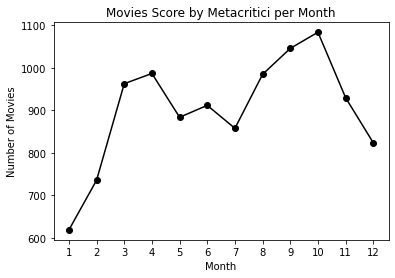

In [9]:
# import matplotlib to crreat charts
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# group metacritic dataset by month and count the number of movies
data = metacritic.groupby(metacritic['month']).agg({'month':'count'})

# Create labels for the chart
plt.title('Movies Score by Metacritici per Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')

# Prevent years convert to decimals
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.plot(data, '-ok')
plt.xticks(range(1,13))
plt.show()

<AxesSubplot:xlabel='month', ylabel='Count'>

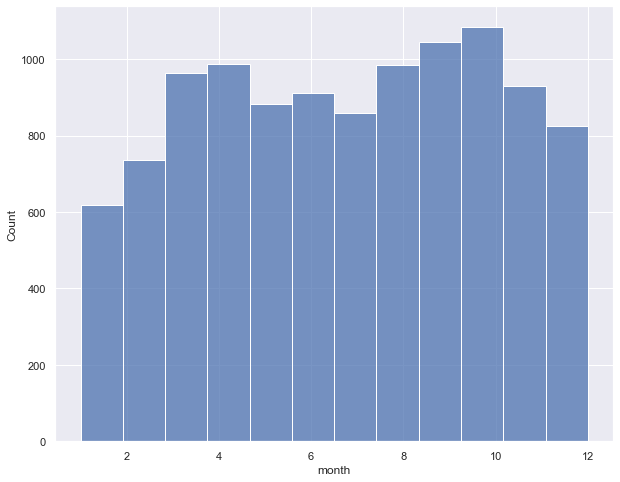

In [10]:
# using seaborn
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
sns.histplot(data=metacritic, x='month', bins=12)

<AxesSubplot:title={'center':'Movies released in each Month'}, xlabel='ReleaseMonth', ylabel='Count'>

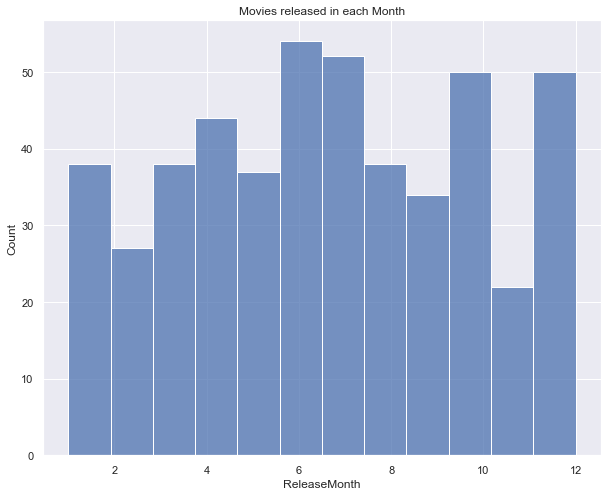

In [11]:
plt.title('Movies released in each Month')
sns.histplot(data=imdb, x='ReleaseMonth', bins=12)

## Is there any relationship between the columns?

Metacritic

<AxesSubplot:>

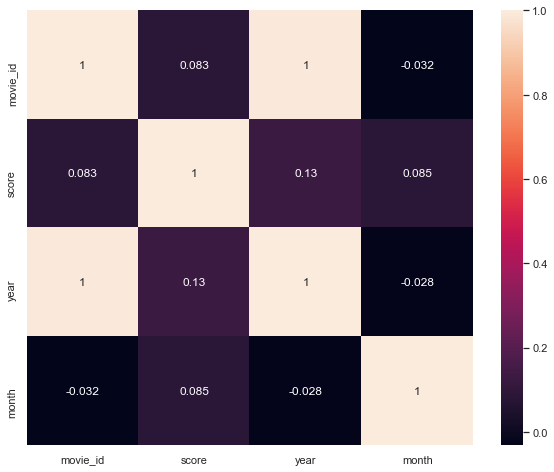

In [13]:
# create correlation heatmap
sns.heatmap(metacritic.corr(), annot=True)

There is no strong correlation between the attributes.

imdb

<AxesSubplot:>

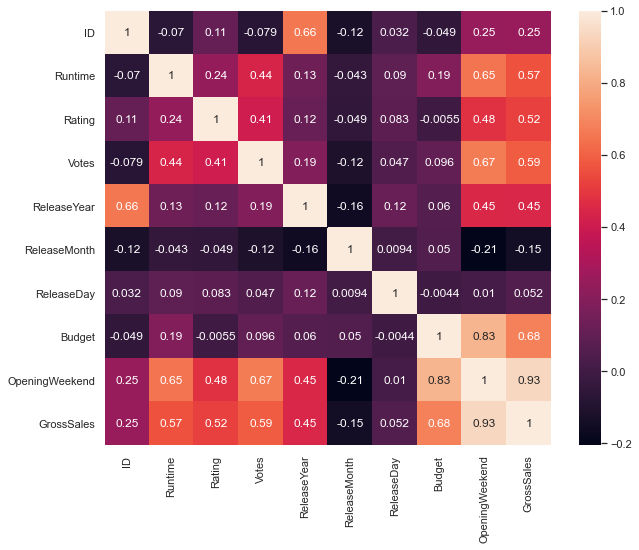

In [14]:
# for imdb superhero
sns.heatmap(imdb.corr(), annot=True)

There are strong relationships between opening weekend with budget and gross sales.

## How many movies were rated for each score?

Metacritic

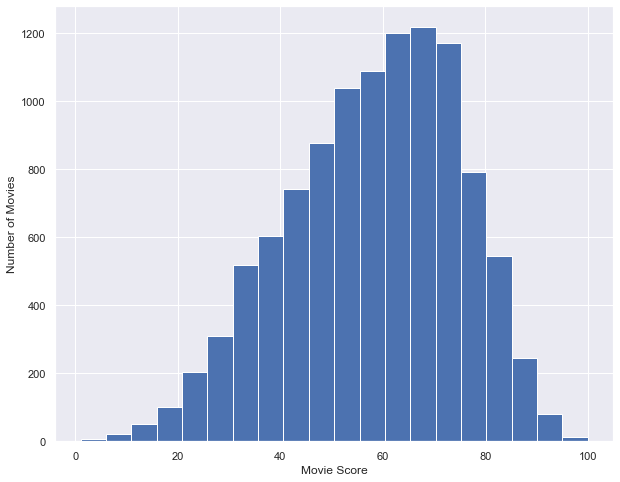

In [15]:
# create histogram that shows the number of movies vs Score

plt.xlabel('Movie Score')
plt.ylabel('Number of Movies')
plt.hist(metacritic['score'],bins=20)
plt.show()


## Which month has the highest movie rating?

Metacritic

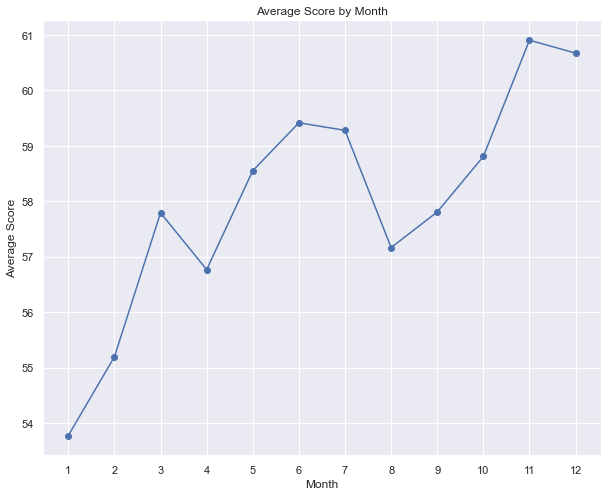

In [16]:
# Find average scores grouped by months
score_permonth = metacritic.groupby(metacritic['month']).agg({'score':'mean'})
plt.title('Average Score by Month')
plt.xlabel('Month')
plt.ylabel('Average Score')

# Prevent years convert to decimals
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xticks(range(0,13))
plt.plot(score_permonth, '-o')


from the plot, highest movies score is in November, and lowest score in January

#### imdb

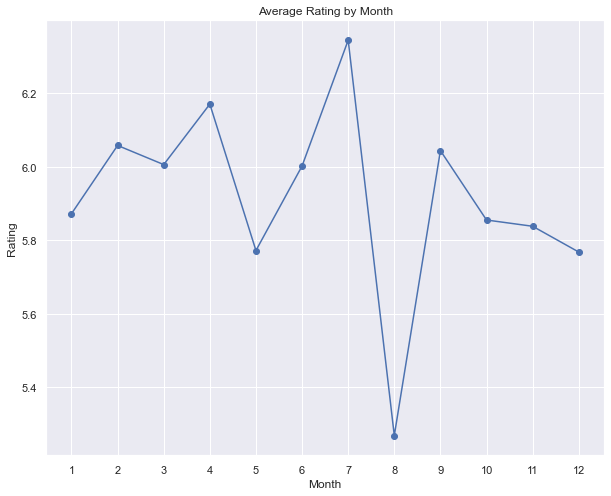

In [17]:
# The plot shows average movie rating by month

# group movies by month and find the ratings
ratings = imdb.groupby('ReleaseMonth').agg({'Rating':'mean'})
plt.title('Average Rating by Month')
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Rating')

# Prevent years convert to decimals
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.plot(ratings, '-o')
plt.show()

Superhero movies:
most released in July and lowest in August

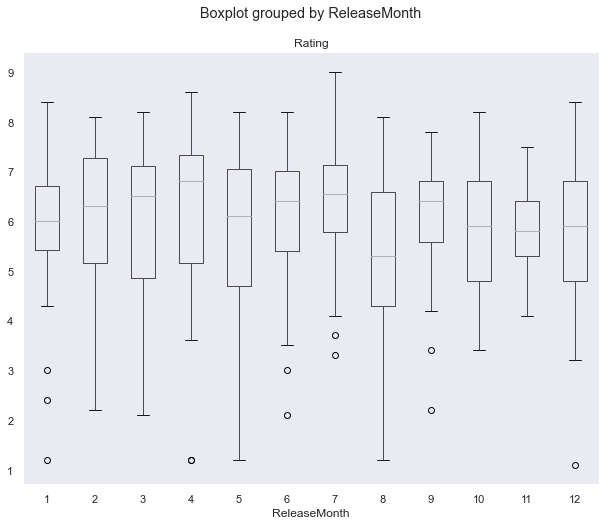

In [18]:
#create boxplot to show imdb ratings grouped by month
fig, ax = plt.subplots(figsize=(10,8))
imdb.boxplot(column='Rating', by='ReleaseMonth', ax=ax, grid=False)
plt.show()

Too many outliers were found.

opening weekend vs budget

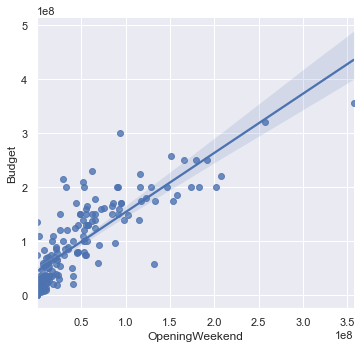

In [19]:
# lineplot using seaborn to find relationship between opening weekend and budget
sns.lmplot(x='OpeningWeekend', y='Budget', data=imdb)

opening weekend vs gross sales

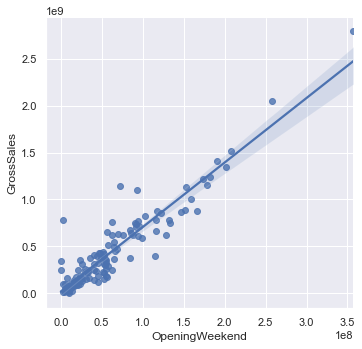

In [20]:
# create lineplot using seaborn to find relationship between opening weekend and gross sales
sns.lmplot(x='OpeningWeekend', y='GrossSales', data=imdb)

Based on the above graphs, we can see that there are strong correlation between opening weekend with budget and gross sales. As openingweekend increases, both budget and gross sales increase.

### Conclusions


From the charts and datasets, I learned that more movies are released in July and December, which is summer and winter break. I also learned that opening weekend are important for movies since it correlates with the movies total demand and gross sales.
To be able to create more accurate charts, I need to improve the dataset by collecting more data. I learned how to use seaborn and matplotlib to create charts in Python. I also learned how to choose which graph to use for different purposes. I need to study more on how to clean to data and make more advanced charts for deeper insights into the data.